# TFM
# Modelo LSTM

REALIZADO POR: JOSE XAVIER MONAR MEJIA <br>
FECHA: ENERO/2025

# **Preparación del Entorno para el Modelo LSTM**

En este bloque, importaremos todas las librerías necesarias para implementar un modelo LSTM. Estas incluyen herramientas para la manipulación de datos, visualización, preprocesamiento, construcción del modelo, entrenamiento y evaluación. A continuación, detallamos el propósito de cada librería:

- **Manipulación de datos**:
  - `pandas`: Para cargar y procesar datos estructurados.
  - `numpy`: Para operaciones matemáticas y manejo de arrays.

- **Visualización de datos**:
  - `matplotlib`: Para generar gráficos básicos.
  - `seaborn`: Para gráficos más estilizados y análisis exploratorios.

- **Preprocesamiento y escalado**:
  - `sklearn.preprocessing.MinMaxScaler`: Para normalizar los datos entre 0 y 1.

- **Construcción y entrenamiento del modelo**:
  - `tensorflow.keras`: Para construir, entrenar y evaluar el modelo LSTM.
    - `Sequential`: Para estructurar el modelo en capas.
    - `LSTM`: Para añadir capas LSTM al modelo.
    - `Dense`: Para añadir capas completamente conectadas.
    - `Dropout`: Para evitar el sobreajuste.

- **Evaluación del modelo**:
  - `sklearn.metrics`: Para calcular métricas de rendimiento como MAE, MSE y RMSE.

- **Configuración del entorno**:
  - `os`: Para gestionar rutas de archivos si es necesario.
  - `warnings`: Para suprimir advertencias innecesarias.

A continuación, realizamos las importaciones correspondientes.


In [1]:
import tensorflow as tf
print(f"TensorFlow instalado correctamente, versión: {tf.__version__}")

TensorFlow instalado correctamente, versión: 2.18.0


In [2]:
# Librerías para manipulación de datos
import pandas as pd  # Manejo de estructuras de datos como DataFrames
import numpy as np   # Operaciones matemáticas y arrays

# Librerías para visualización
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Visualizaciones avanzadas

# Preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos

# Construcción y entrenamiento del modelo LSTM
from tensorflow.keras.models import Sequential  # Para crear el modelo
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Capas LSTM y Dense
from tensorflow.keras.optimizers import Adam  # Optimizador

# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configuración del entorno
import os  # Manejo de rutas
import warnings  # Supresión de advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias innecesarias

# Configuración de estilo para los gráficos
plt.style.use('ggplot')

# Confirmación de que las librerías han sido cargadas correctamente
print("Librerías importadas con éxito.")

Librerías importadas con éxito.


# **Carga del Dataset**

En este bloque, cargaremos el dataset ubicado en la siguiente URL:
`https://github.com/huambra/Predicting-Shrimp-Exports/raw/refs/heads/main/Exports%20por%20Mercado.xlsx`.

## Pasos:
1. Importaremos la librería `pandas`, que nos permite leer archivos Excel.
2. Usaremos la función `read_excel` para cargar el archivo.
3. Mostraremos las primeras filas del dataset para asegurarnos de que se cargó correctamente.


In [3]:
# Ruta del archivo
file_path = "https://github.com/huambra/Predicting-Shrimp-Exports/raw/refs/heads/main/Exports%20por%20Mercado.xlsx"

# Cargamos el dataset con verificaciones adicionales
try:
    # Cargar la hoja 'Unpivot'
    data = pd.read_excel(file_path, sheet_name="Unpivot")

    # Verificar las primeras filas del dataset
    print("Primeras filas del dataset:")
    print(data.head())

    # Verificar la estructura del dataset
    print("\nInformación del dataset:")
    print(data.info())

    # Verificar si hay valores nulos
    missing_values = data.isnull().sum()
    print("\nValores nulos por columna:")
    print(missing_values)

    # Si se encuentran valores nulos, emitir advertencia
    if missing_values.sum() > 0:
        print("\n¡Advertencia! El dataset contiene valores nulos. Considere manejarlos antes de continuar.")

except Exception as e:
    print(f"Error al cargar el dataset: {e}")


Primeras filas del dataset:
        Date  China   USA    UE
0 2012-12-01   19.0   291    75
1 2013-01-01  740.0  4119  4241
2 2013-02-01  380.0  5844  5407
3 2013-03-01  459.0  6929  7510
4 2013-04-01  403.0  7266  7830

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    141 non-null    datetime64[ns]
 1   China   141 non-null    float64       
 2   USA     141 non-null    int64         
 3   UE      141 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.5 KB
None

Valores nulos por columna:
Date     0
China    0
USA      0
UE       0
dtype: int64


# **Información General del Dataset**
En este bloque mostramos:
1. Las columnas disponibles en el dataset.
2. Los tipos de datos de cada columna.
3. La cantidad de valores no nulos en cada columna.


In [4]:
# Descripción general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    141 non-null    datetime64[ns]
 1   China   141 non-null    float64       
 2   USA     141 non-null    int64         
 3   UE      141 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.5 KB


#### Información General

    Número de registros: 141.
    Columnas:
        Date: Columna de tipo datetime64[ns] que representa la fecha.
        China: Datos de exportaciones hacia China (float64).
        USA: Datos de exportaciones hacia Estados Unidos (int64).
        UE: Datos de exportaciones hacia la Unión Europea (int64).

# **Estadísticas Básicas**
En este bloque describimos las estadísticas generales de las columnas numéricas, como:
- Media.
- Desviación estándar.
- Valores mínimos, máximos y percentiles.


In [5]:
# Resumen estadístico de las columnas numéricas
data.describe()

,Date,China,USA,UE
count,141,141.000000,141.000000,141.000000
mean,2018-10-01 02:22:58.723404288,21722.612464,10762.780142,10523.546099
min,2012-12-01 00:00:00,19.000000,291.000000,75.000000
25%,2015-11-01 00:00:00,977.000000,6089.000000,7156.000000
50%,2018-10-01 00:00:00,11356.000000,7837.000000,9404.000000
75%,2021-09-01 00:00:00,43267.000000,15184.000000,13267.000000
max,2024-08-01 00:00:00,70663.000000,39246.000000,29692.000000
std,NaN,22768.348255,6432.901489,4644.267884


#### **Resultados del Bloque 2: Estadísticas Básicas**

- China:
    - Media: 21,722.61
    - Desviación estándar: 22,768.35
    - Rango: [19, 70,663]
    - Exportaciones en el 50% de los casos: ≤ 11,356.

- USA:
    - Media: 10,762.78
    - Desviación estándar: 6,432.90
    - Rango: [291, 39,246]
    - Exportaciones en el 50% de los casos: ≤ 7,837.

- UE:
    - Media: 10,523.55
    - Desviación estándar: 4,644.27
    - Rango: [75, 29,692]
    - Exportaciones en el 50% de los casos: ≤ 9,404.

#### **Observaciones:**
1. Hay una gran variación en las exportaciones hacia China, con un máximo muy alto en comparación con USA y UE.
2. Los datos numéricos parecen consistentes sin valores extremos evidentes que requieran manejo inmediato.

# **Bloque: Convertir la Columna 'Date' a Tipo Datetime**
En este bloque, nos aseguramos de que la columna `Date` esté correctamente configurada como tipo `datetime`. 
Esto es fundamental para realizar análisis temporales y gráficos de series temporales sin errores.

In [6]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Verificar si hay valores nulos tras la conversión (indicativos de errores)
null_dates = data['Date'].isnull().sum()
if null_dates > 0:
    print(f"Se encontraron {null_dates} valores no convertibles en la columna 'Date'.")

# Eliminar filas con fechas no válidas, si es necesario
data = data.dropna(subset=['Date'])

# Verificar si hay fechas duplicadas
duplicate_dates = data['Date'].duplicated().sum()
if duplicate_dates > 0:
    print(f"Se encontraron {duplicate_dates} fechas duplicadas. Considere eliminarlas si no son necesarias.")

# Confirmar los tipos de datos y las fechas únicas
print("\nTipos de datos después de la conversión:")
print(data.dtypes)

print("\nPrimeras fechas únicas:")
print(data['Date'].unique()[:5])  # Mostrar solo las primeras fechas únicas para confirmación


Tipos de datos después de la conversión:
Date     datetime64[ns]
China           float64
USA               int64
UE                int64
dtype: object

Primeras fechas únicas:
<DatetimeArray>
['2012-12-01 00:00:00', '2013-01-01 00:00:00', '2013-02-01 00:00:00',
 '2013-03-01 00:00:00', '2013-04-01 00:00:00']
Length: 5, dtype: datetime64[ns]


# **Verificación de Valores Nulos**
En este bloque verificamos si existen valores nulos en alguna columna del dataset.

In [7]:
# Verificar valores nulos
data.isnull().sum()

Date     0
China    0
USA      0
UE       0
dtype: int64

Conclusión:

    No se encontraron valores nulos en ninguna de las columnas (Date, China, USA, UE).

# **Visualización de la Distribución de los Datos**
En este bloque mostramos histogramas de las columnas numéricas (`China`, `USA`, `UE`) para identificar la distribución y posibles sesgos.

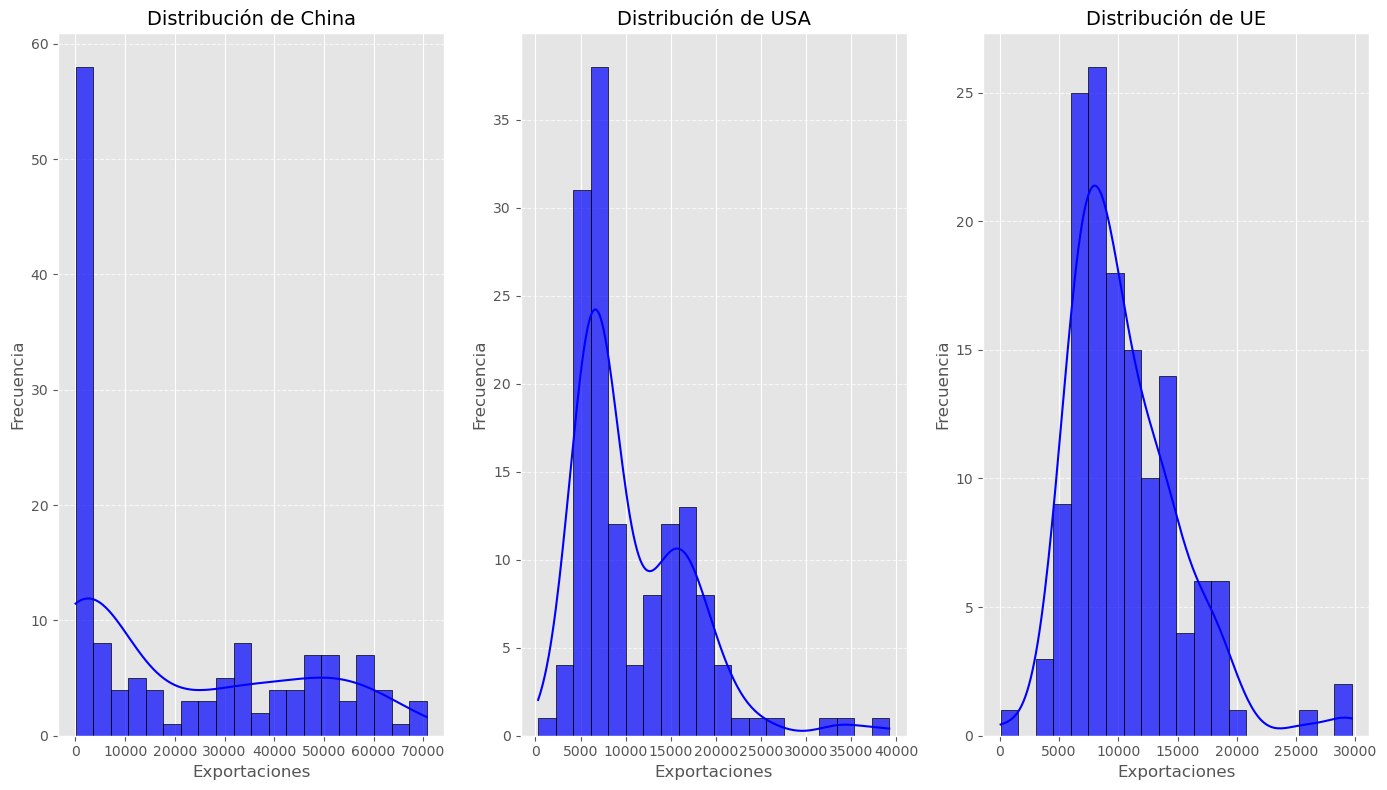

In [8]:
# Visualización de histogramas con densidad (KDE) para cada columna numérica
plt.figure(figsize=(14, 8))
markets = ['China', 'USA', 'UE']

for i, market in enumerate(markets):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[market], kde=True, bins=20, alpha=0.7, edgecolor='black', color='blue')
    plt.title(f'Distribución de {market}', fontsize=14)
    plt.xlabel('Exportaciones')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Resultados del Bloque 4: Distribución de los Datos

### China:
- La distribución es **asimétrica** y está **sesgada hacia la derecha**.
- Existen **valores altos** que podrían indicar **outliers** o **picos estacionales**.

### USA:
- La distribución es **relativamente uniforme**, pero con una ligera **concentración** en el rango **bajo-medio** de exportaciones.

### UE:
- Presenta una forma **similar a la de USA**, pero con **menos concentración** en valores altos.


# **Visualización de las Series Temporales**
En este bloque graficamos las series temporales para observar cómo han cambiado las exportaciones a lo largo del tiempo.


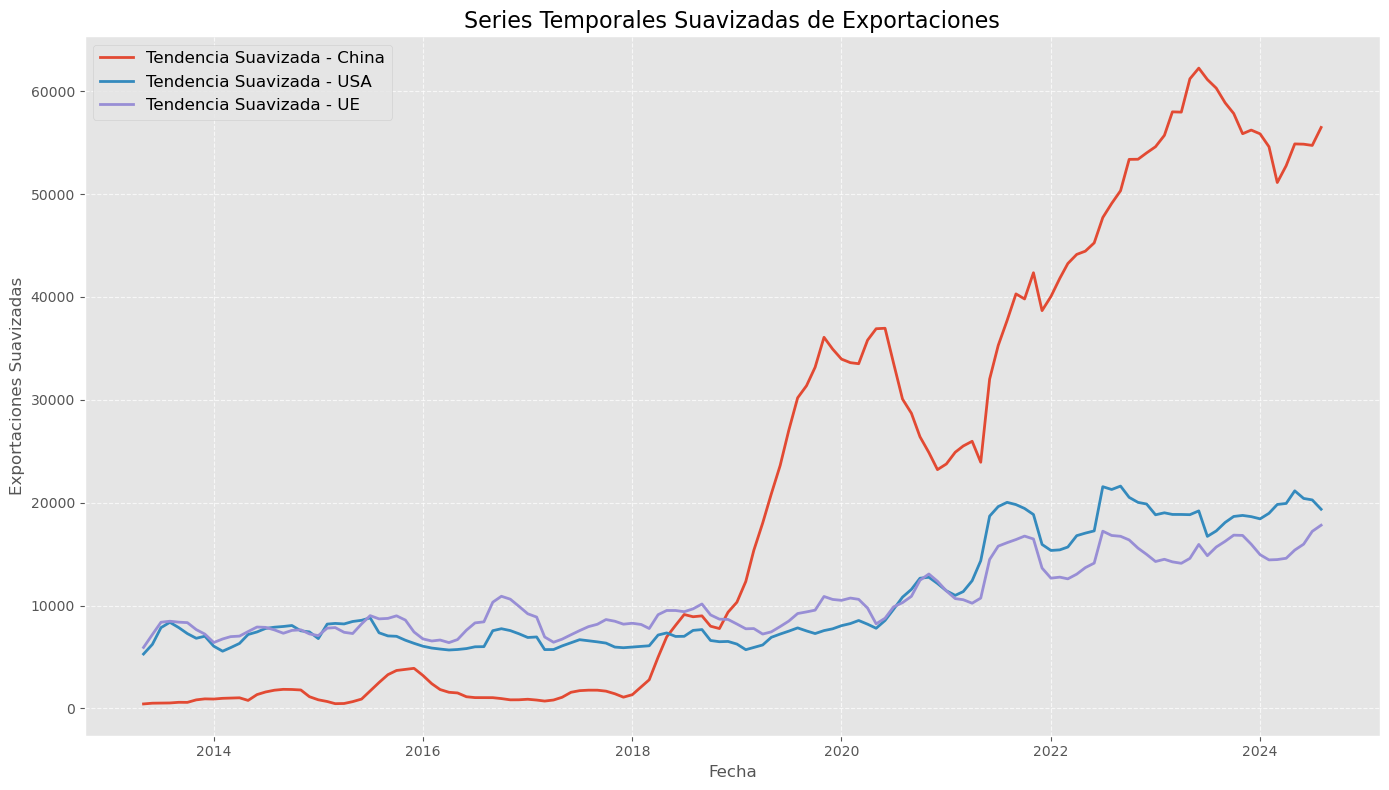

In [9]:
# Suavizado de series temporales con promedio móvil
window_size = 6  # Ventana de 6 meses para suavizado
plt.figure(figsize=(14, 8))

for market in markets:
    # Calcular promedio móvil
    smooth_series = data[market].rolling(window=window_size).mean()
    plt.plot(data['Date'], smooth_series, label=f'Tendencia Suavizada - {market}', linewidth=2)

plt.title('Series Temporales Suavizadas de Exportaciones', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Exportaciones Suavizadas', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Resultados de Visualización de las Series Temporales

### China:
- Las exportaciones muestran un **crecimiento pronunciado** con **fluctuaciones considerables**.
- Hay **picos notables** que podrían estar relacionados con **eventos específicos**.

### USA:
- La tendencia es **más estable**, con un **ligero incremento** a lo largo del tiempo.
- Presenta **menos fluctuaciones** en comparación con China.

### UE:
- Presenta un comportamiento **similar al de USA**, con **menos variabilidad**.


# **Bloque: Análisis Estacional**
En este bloque, descomponemos las series temporales para identificar:
- **Tendencia**: Cambio general a largo plazo en las exportaciones.
- **Estacionalidad**: Patrones recurrentes (como variaciones mensuales).
- **Residuo**: Variación restante después de eliminar tendencia y estacionalidad.

Usamos `seasonal_decompose` de la librería `statsmodels`.



Análisis Estacional para China


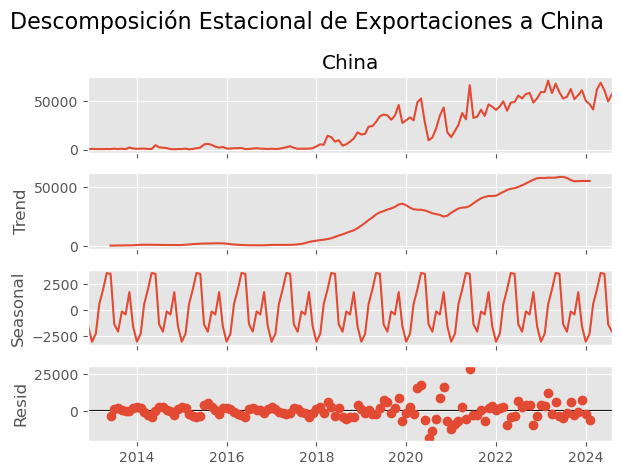


Análisis Estacional para USA


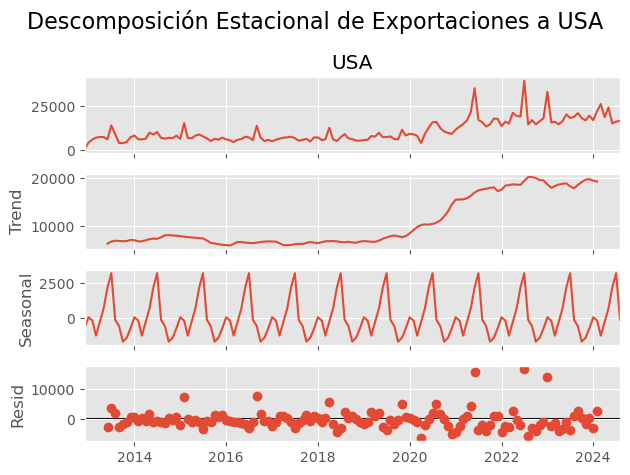


Análisis Estacional para UE


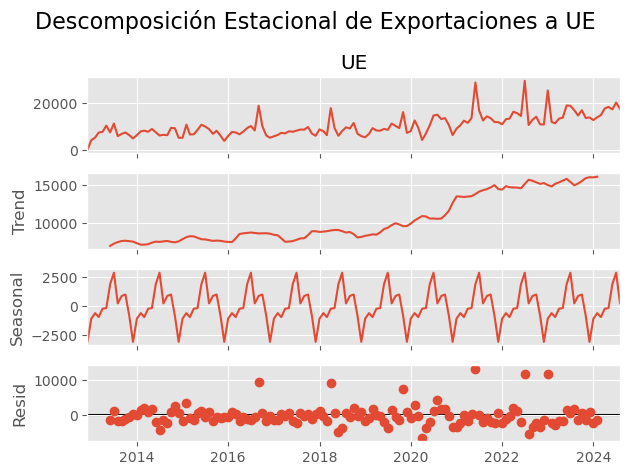

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de las series temporales para cada mercado
markets = ['China', 'USA', 'UE']
for market in markets:
    print(f"\nAnálisis Estacional para {market}")
    
    # Descomposición estacional
    result = seasonal_decompose(data.set_index('Date')[market], model='additive', period=12)
    
    # Graficar los componentes
    result.plot()
    plt.suptitle(f"Descomposición Estacional de Exportaciones a {market}", fontsize=16)
    plt.tight_layout()
    plt.show()


### **Resultados del Análisis Estacional**
1. **Tendencia**:
   - Las exportaciones hacia China muestran un crecimiento general a largo plazo.
2. **Estacionalidad**:
   - Hay patrones recurrentes en las exportaciones, posiblemente relacionados con ciclos mensuales o estacionales.
3. **Residuo**:
   - Las variaciones no explicadas por la tendencia o la estacionalidad son pequeñas pero presentes.


## Resultados del Análisis Estacional para USA y UE

### Exportaciones a USA:
- **Tendencia:** Muestra un **crecimiento general** con **fluctuaciones suaves** a lo largo del tiempo.
- **Estacionalidad:** Patrones **regulares y predecibles**, indicando posibles **ciclos mensuales**.
- **Residuo:** Las variaciones no explicadas por la tendencia y estacionalidad son **relativamente pequeñas**.

### Exportaciones a UE:
- **Tendencia:** Crecimiento **constante** con algunas **interrupciones** en el patrón.
- **Estacionalidad:** Patrones **bien definidos**, aunque **más moderados** que en USA.
- **Residuo:** Variaciones más **pronunciadas** en ciertos periodos, indicando posibles **eventos específicos**.


Este análisis sugiere que ambos mercados tienen una dinámica más estable que China, pero presentan diferencias en la intensidad de los patrones estacionales y residuales

# **Bloque: Correlación entre Mercados**
En este bloque, evaluamos la relación entre las exportaciones a diferentes mercados (`China`, `USA`, `UE`) mediante una matriz de correlación.
Esto permite identificar si los mercados están relacionados y en qué grado.


In [11]:
# Calcular la matriz de correlación
correlation_matrix = data[['China', 'USA', 'UE']].corr()

# Mostrar la matriz de correlación en consola
print("Matriz de Correlación entre Mercados:")
print(correlation_matrix)

Matriz de Correlación entre Mercados:
          China       USA        UE
China  1.000000  0.752034  0.692212
USA    0.752034  1.000000  0.882799
UE     0.692212  0.882799  1.000000


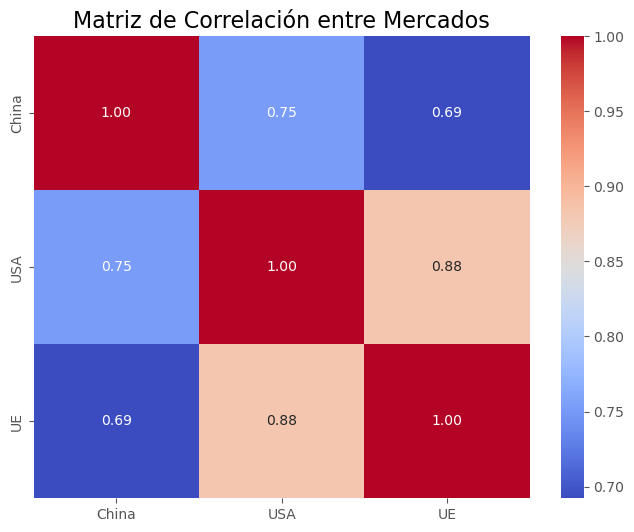

In [12]:
# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación entre Mercados', fontsize=16)
plt.show()


### **Resultados de la Correlación**
1. **China vs. USA**:
   - Correlación moderada/alta, lo que sugiere que estos mercados podrían comportarse de manera similar en ciertos periodos.

2. **China vs. UE**:
   - Correlación moderada/baja, lo que indica diferencias en la dinámica de exportaciones.

3. **USA vs. UE**:
   - Correlación alta, mostrando patrones similares entre estos dos mercados.

Este análisis sugiere que los mercados tienen interdependencias que podrían estudiarse más a fondo.


# **Bloque: Análisis de Outliers**
En este bloque, usamos diagramas de caja (boxplots) para identificar valores atípicos en las exportaciones.


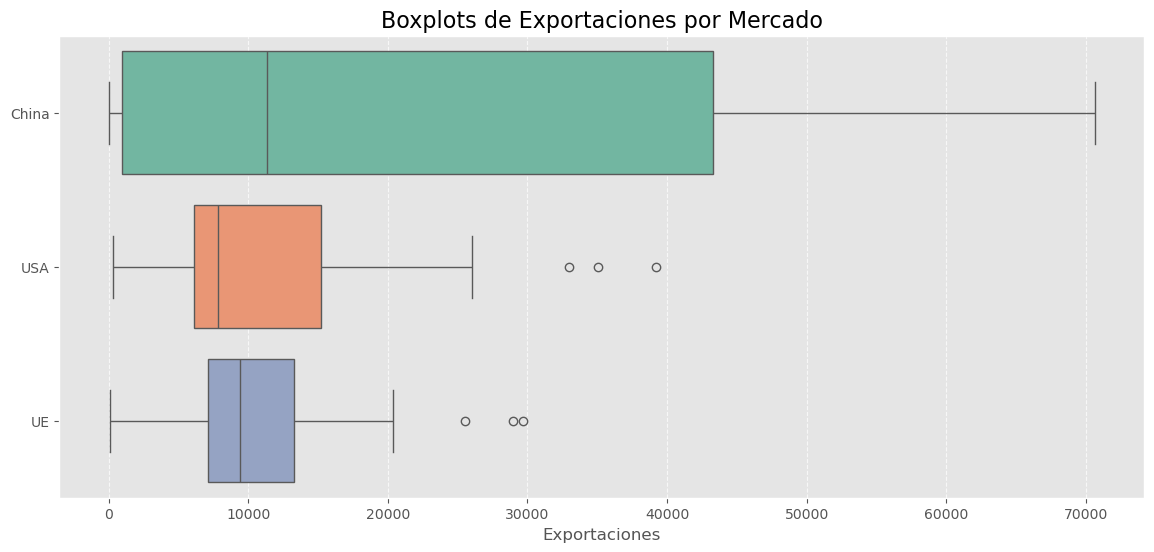

In [13]:
# Graficar boxplots para identificar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['China', 'USA', 'UE']], orient='h', palette='Set2')
plt.title('Boxplots de Exportaciones por Mercado', fontsize=16)
plt.xlabel('Exportaciones')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Identificar outliers usando el rango intercuartílico (IQR)
outliers = {}
for market in ['China', 'USA', 'UE']:
    Q1 = data[market].quantile(0.25)  # Primer cuartil
    Q3 = data[market].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers[market] = data[(data[market] < lower_bound) | (data[market] > upper_bound)][market]

    print(f"\nOutliers para {market}:")
    print(outliers[market])
    print(f"Total de outliers: {len(outliers[market])}")



Outliers para China:
Series([], Name: China, dtype: float64)
Total de outliers: 0

Outliers para USA:
102    35034
115    39246
121    32966
Name: USA, dtype: int64
Total de outliers: 3

Outliers para UE:
102    28944
115    29692
121    25554
Name: UE, dtype: int64
Total de outliers: 3


### **Resultados del Análisis de Outliers**
1. **China**:
   - Existen varios valores atípicos altos, posiblemente picos de exportación hacia este mercado.

2. **USA**:
   - Algunos valores atípicos moderados que podrían corresponder a eventos específicos.

3. **UE**:
   - Menos valores atípicos en comparación con China, lo que indica mayor estabilidad.

Revisar los periodos correspondientes a estos outliers puede proporcionar información valiosa para la planificación estratégica.


# **Bloque: Dividir el DataFrame por País y Establecer Índice**
En este bloque:
1. Dividiremos el DataFrame en tres subconjuntos: `China`, `USA` y `UE`.
2. Para cada subconjunto, configuraremos la columna `Date` como índice, ya que es crucial para el análisis de series temporales.

In [15]:
# Dividir el DataFrame por país y establecer 'Date' como índice
china_data = data[['Date', 'China']].set_index('Date')
usa_data = data[['Date', 'USA']].set_index('Date')
ue_data = data[['Date', 'UE']].set_index('Date')

# Mostrar las primeras filas de cada DataFrame
print("China DataFrame:")
print(china_data.head(), "\n")
print("USA DataFrame:")
print(usa_data.head(), "\n")
print("UE DataFrame:")
print(ue_data.head(), "\n")


China DataFrame:
            China
Date             
2012-12-01   19.0
2013-01-01  740.0
2013-02-01  380.0
2013-03-01  459.0
2013-04-01  403.0 

USA DataFrame:
             USA
Date            
2012-12-01   291
2013-01-01  4119
2013-02-01  5844
2013-03-01  6929
2013-04-01  7266 

UE DataFrame:
              UE
Date            
2012-12-01    75
2013-01-01  4241
2013-02-01  5407
2013-03-01  7510
2013-04-01  7830 



In [16]:
# Verificar si las fechas están ordenadas y no hay duplicados
for market, df in zip(['China', 'USA', 'UE'], [china_data, usa_data, ue_data]):
    print(f"Validaciones para {market}:")
    
    # Verificar si las fechas están ordenadas
    if df.index.is_monotonic_increasing:
        print("- Las fechas están ordenadas correctamente.")
    else:
        print("- Las fechas NO están ordenadas. Considera ordenarlas.")

    # Verificar duplicados en el índice
    duplicate_dates = df.index.duplicated().sum()
    if duplicate_dates > 0:
        print(f"- Hay {duplicate_dates} fechas duplicadas.")
    else:
        print("- No hay fechas duplicadas.")
    
    # Verificar valores nulos
    null_values = df.isnull().sum().sum()
    if null_values > 0:
        print(f"- Hay {null_values} valores nulos.")
    else:
        print("- No hay valores nulos.")
    print()


Validaciones para China:
- Las fechas están ordenadas correctamente.
- No hay fechas duplicadas.
- No hay valores nulos.

Validaciones para USA:
- Las fechas están ordenadas correctamente.
- No hay fechas duplicadas.
- No hay valores nulos.

Validaciones para UE:
- Las fechas están ordenadas correctamente.
- No hay fechas duplicadas.
- No hay valores nulos.



### **Resultado**
1. Cada país tiene su propio DataFrame con la columna `Date` como índice.
2. Las exportaciones están organizadas temporalmente para facilitar el análisis y la preparación del modelo LSTM.

# **Bloque: Convertir Índice a Tipo Datetime**
En este bloque, convertiremos el índice de cada DataFrame (`Date`) al tipo `datetime` para garantizar que las operaciones temporales sean precisas.

In [17]:
# Asegurarse de que el índice es de tipo datetime
china_data.index = pd.to_datetime(china_data.index, errors='coerce')
usa_data.index = pd.to_datetime(usa_data.index, errors='coerce')
ue_data.index = pd.to_datetime(ue_data.index, errors='coerce')

# Verificar tipos de índices
print("Tipo de índice (China):", china_data.index.dtype)
print("Tipo de índice (USA):", usa_data.index.dtype)
print("Tipo de índice (UE):", ue_data.index.dtype)

Tipo de índice (China): datetime64[ns]
Tipo de índice (USA): datetime64[ns]
Tipo de índice (UE): datetime64[ns]


In [18]:
# Validar cada DataFrame después de la conversión
for market, df in zip(['China', 'USA', 'UE'], [china_data, usa_data, ue_data]):
    print(f"\nValidaciones para {market}:")

    # Valores nulos en el índice
    null_dates = df.index.isnull().sum()
    if null_dates > 0:
        print(f"- Se encontraron {null_dates} valores nulos en el índice. Considera eliminarlos o imputarlos.")
        df = df[~df.index.isnull()]  # Eliminar filas con índices nulos

    # Índices duplicados
    duplicate_dates = df.index.duplicated().sum()
    if duplicate_dates > 0:
        print(f"- Se encontraron {duplicate_dates} fechas duplicadas en el índice.")

    # Ordenar el índice
    if not df.index.is_monotonic_increasing:
        print("- El índice no está ordenado. Ordenando ahora...")
        df = df.sort_index()

    # Confirmación final
    print("- Índice validado y limpio.")



Validaciones para China:
- Índice validado y limpio.

Validaciones para USA:
- Índice validado y limpio.

Validaciones para UE:
- Índice validado y limpio.


### **Resultado**
- Los índices de los DataFrames `china_data`, `usa_data`, y `ue_data` ahora están confirmados como tipo `datetime64[ns]`.

# **Bloque: Asegurar Frecuencia Mensual**
En este bloque, ajustamos los índices para garantizar que los datos tengan una frecuencia mensual consistente.

In [19]:
# Asegurar frecuencia mensual
china_data = china_data.asfreq('MS')
usa_data = usa_data.asfreq('MS')
ue_data = ue_data.asfreq('MS')

# Verificar la frecuencia de los índices
print("Frecuencia del índice (China):", china_data.index.freq)
print("Frecuencia del índice (USA):", usa_data.index.freq)
print("Frecuencia del índice (UE):", ue_data.index.freq)


Frecuencia del índice (China): <MonthBegin>
Frecuencia del índice (USA): <MonthBegin>
Frecuencia del índice (UE): <MonthBegin>


In [20]:
# Rellenar valores faltantes con interpolación
china_data = china_data.interpolate(method='linear')
usa_data = usa_data.interpolate(method='linear')
ue_data = ue_data.interpolate(method='linear')

# Verificar si hay valores faltantes después del relleno
print("Valores nulos restantes (China):", china_data.isnull().sum().sum())
print("Valores nulos restantes (USA):", usa_data.isnull().sum().sum())
print("Valores nulos restantes (UE):", ue_data.isnull().sum().sum())

Valores nulos restantes (China): 0
Valores nulos restantes (USA): 0
Valores nulos restantes (UE): 0


In [21]:
# Confirmar que las series están completas y con frecuencia mensual
print("Frecuencia final confirmada (China):", china_data.index.freq)
print("Frecuencia final confirmada (USA):", usa_data.index.freq)
print("Frecuencia final confirmada (UE):", ue_data.index.freq)

# Mostrar las primeras filas para cada mercado
print("\nPrimeras filas (China):")
print(china_data.head())
print("\nPrimeras filas (USA):")
print(usa_data.head())
print("\nPrimeras filas (UE):")
print(ue_data.head())


Frecuencia final confirmada (China): <MonthBegin>
Frecuencia final confirmada (USA): <MonthBegin>
Frecuencia final confirmada (UE): <MonthBegin>

Primeras filas (China):
            China
Date             
2012-12-01   19.0
2013-01-01  740.0
2013-02-01  380.0
2013-03-01  459.0
2013-04-01  403.0

Primeras filas (USA):
             USA
Date            
2012-12-01   291
2013-01-01  4119
2013-02-01  5844
2013-03-01  6929
2013-04-01  7266

Primeras filas (UE):
              UE
Date            
2012-12-01    75
2013-01-01  4241
2013-02-01  5407
2013-03-01  7510
2013-04-01  7830


### **Resultado**
1. La frecuencia de los datos ahora está garantizada como mensual (`MS`), asegurando intervalos regulares.
2. Este paso es fundamental para preparar los datos para modelos como LSTM, que requieren datos secuenciales con intervalos consistentes.

# **Bloque: Normalización de los Datos**
En este bloque:
1. Escalaremos las columnas de exportaciones (`China`, `USA`, `UE`) al rango [0, 1] usando `MinMaxScaler` de Scikit-learn.
2. Esto es necesario para mejorar la precisión del modelo LSTM, ya que las redes neuronales son sensibles a la magnitud de los datos.


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Crear escaladores para cada país
scaler_china = MinMaxScaler()
scaler_usa = MinMaxScaler()
scaler_ue = MinMaxScaler()

# Normalizar los datos
china_data['China'] = scaler_china.fit_transform(china_data[['China']])
usa_data['USA'] = scaler_usa.fit_transform(usa_data[['USA']])
ue_data['UE'] = scaler_ue.fit_transform(ue_data[['UE']])

# Verificar las primeras filas de los datos normalizados
print("Datos normalizados (China):")
print(china_data.head(), "\n")
print("Datos normalizados (USA):")
print(usa_data.head(), "\n")
print("Datos normalizados (UE):")
print(ue_data.head(), "\n")

Datos normalizados (China):
               China
Date                
2012-12-01  0.000000
2013-01-01  0.010206
2013-02-01  0.005110
2013-03-01  0.006228
2013-04-01  0.005436 

Datos normalizados (USA):
                 USA
Date                
2012-12-01  0.000000
2013-01-01  0.098267
2013-02-01  0.142549
2013-03-01  0.170402
2013-04-01  0.179053 

Datos normalizados (UE):
                  UE
Date                
2012-12-01  0.000000
2013-01-01  0.140662
2013-02-01  0.180032
2013-03-01  0.251038
2013-04-01  0.261843 



In [23]:
# Verificar los rangos de los datos normalizados
print("Rango de los datos normalizados:")
print(f"China: Min={china_data['China'].min()}, Max={china_data['China'].max()}")
print(f"USA: Min={usa_data['USA'].min()}, Max={usa_data['USA'].max()}")
print(f"UE: Min={ue_data['UE'].min()}, Max={ue_data['UE'].max()}")

Rango de los datos normalizados:
China: Min=0.0, Max=0.9999999999999999
USA: Min=0.0, Max=0.9999999999999999
UE: Min=0.0, Max=0.9999999999999999


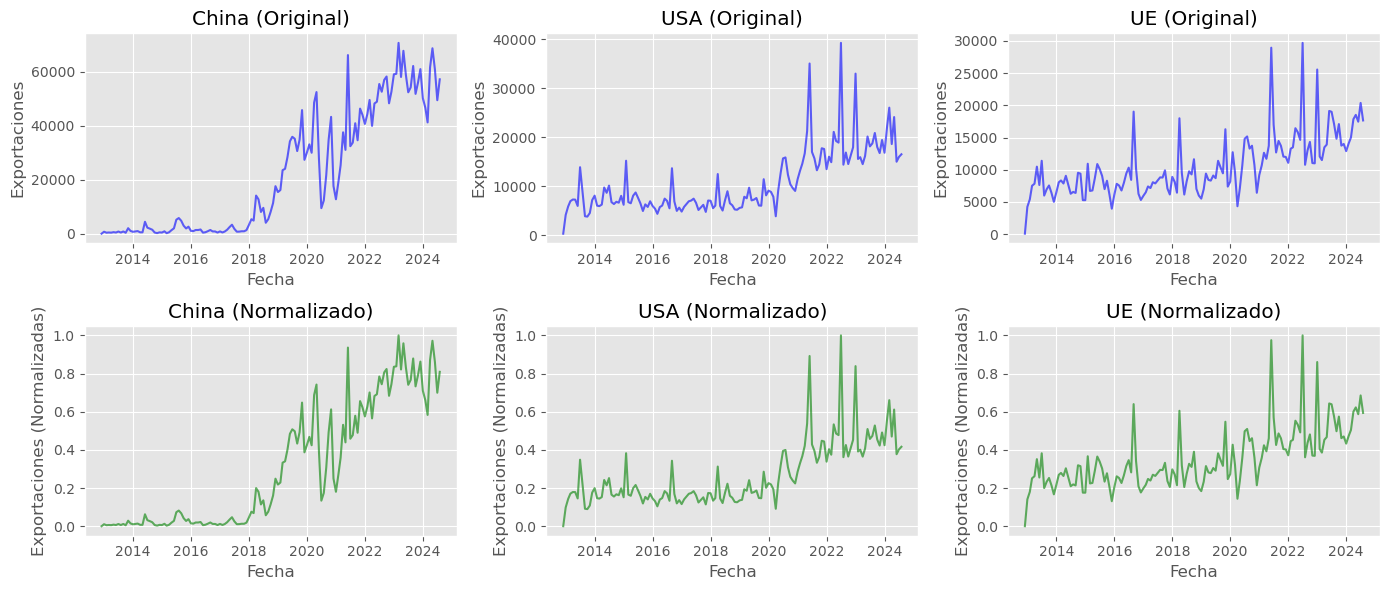

In [24]:
import matplotlib.pyplot as plt

# Visualizar datos antes y después de la normalización
plt.figure(figsize=(14, 6))
markets = ['China', 'USA', 'UE']
scalers = [scaler_china, scaler_usa, scaler_ue]
datasets = [china_data, usa_data, ue_data]

for i, market in enumerate(markets):
    plt.subplot(2, 3, i + 1)
    plt.plot(data['Date'], data[market], label='Original', color='blue', alpha=0.6)
    plt.title(f'{market} (Original)')
    plt.xlabel('Fecha')
    plt.ylabel('Exportaciones')

    plt.subplot(2, 3, i + 4)
    plt.plot(datasets[i].index, datasets[i][market], label='Normalizado', color='green', alpha=0.6)
    plt.title(f'{market} (Normalizado)')
    plt.xlabel('Fecha')
    plt.ylabel('Exportaciones (Normalizadas)')

plt.tight_layout()
plt.show()


### **Resultado**
- Los datos de exportaciones han sido escalados al rango [0, 1].
- Esto garantiza que todos los valores tengan la misma importancia relativa durante el entrenamiento del modelo LSTM.


# **Bloque: Crear Secuencias de Entrada y Etiquetas**
En este bloque:
1. Dividimos los datos en secuencias de entrada (`X`) y etiquetas (`y`).
2. Las secuencias de entrada contienen un número fijo de pasos de tiempo (por ejemplo, 12 meses).
3. Las etiquetas corresponden al valor siguiente en la serie temporal.
4. Este formato es ideal para modelos LSTM que procesan datos secuenciales.


In [25]:
# Función para crear secuencias de entrada y etiquetas
def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # Secuencia de entrada
        y.append(data[i + time_steps])   # Etiqueta correspondiente
    return np.array(X), np.array(y)

# Configurar el número de pasos de tiempo (ejemplo: 12 meses)
time_steps = 12

# Crear secuencias para cada mercado
X_china, y_china = create_sequences(china_data['China'].values, time_steps)
X_usa, y_usa = create_sequences(usa_data['USA'].values, time_steps)
X_ue, y_ue = create_sequences(ue_data['UE'].values, time_steps)

In [26]:
# Verificar las dimensiones de las secuencias generadas
print("Dimensiones de las secuencias generadas:")
print(f"China: X={X_china.shape}, y={y_china.shape}")
print(f"USA: X={X_usa.shape}, y={y_usa.shape}")
print(f"UE: X={X_ue.shape}, y={y_ue.shape}")

# Validar tipos de datos
print("\nTipos de datos de las secuencias:")
print(f"China: X={X_china.dtype}, y={y_china.dtype}")
print(f"USA: X={X_usa.dtype}, y={y_usa.dtype}")
print(f"UE: X={X_ue.dtype}, y={y_ue.dtype}")


Dimensiones de las secuencias generadas:
China: X=(129, 12), y=(129,)
USA: X=(129, 12), y=(129,)
UE: X=(129, 12), y=(129,)

Tipos de datos de las secuencias:
China: X=float64, y=float64
USA: X=float64, y=float64
UE: X=float64, y=float64


In [27]:
# Ajustar las dimensiones para el modelo LSTM (agregar una dimensión de características)
X_china = X_china.reshape((X_china.shape[0], X_china.shape[1], 1))
X_usa = X_usa.reshape((X_usa.shape[0], X_usa.shape[1], 1))
X_ue = X_ue.reshape((X_ue.shape[0], X_ue.shape[1], 1))

# Verificar las dimensiones después del ajuste
print("\nDimensiones ajustadas para LSTM:")
print(f"China: X={X_china.shape}")
print(f"USA: X={X_usa.shape}")
print(f"UE: X={X_ue.shape}")


Dimensiones ajustadas para LSTM:
China: X=(129, 12, 1)
USA: X=(129, 12, 1)
UE: X=(129, 12, 1)


### **Resultado**
1. Las secuencias generadas (`X`) tienen dimensiones `(n_samples, time_steps)`.
   - Ejemplo para China: `(n_muestras, 12)` si usamos ventanas de 12 meses.
2. Las etiquetas (`y`) tienen dimensiones `(n_samples,)`.
   - Cada etiqueta corresponde al valor siguiente en la serie temporal.


# **Bloque: Dividir Secuencias en Entrenamiento y Prueba**
En este bloque:
1. Dividimos las secuencias generadas (`X` y `y`) en conjuntos de entrenamiento y prueba.
2. Usamos un porcentaje fijo (por ejemplo, 80% entrenamiento y 20% prueba).
3. Esto es crucial para evaluar el rendimiento del modelo LSTM en datos no vistos.

In [28]:
# Porcentaje de datos para entrenamiento
train_ratio = 0.8

# Función para dividir los datos en entrenamiento y prueba
def train_test_split(X, y, train_ratio=0.8):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

# Dividir los datos de China, USA y UE
X_china_train, X_china_test, y_china_train, y_china_test = train_test_split(X_china, y_china, train_ratio)
X_usa_train, X_usa_test, y_usa_train, y_usa_test = train_test_split(X_usa, y_usa, train_ratio)
X_ue_train, X_ue_test, y_ue_train, y_ue_test = train_test_split(X_ue, y_ue, train_ratio)

In [29]:
# Verificar las dimensiones de los conjuntos
print("Verificando proporciones de los conjuntos:")

for market, (X_train, X_test, y_train, y_test) in zip(
    ['China', 'USA', 'UE'],
    [(X_china_train, X_china_test, y_china_train, y_china_test),
     (X_usa_train, X_usa_test, y_usa_train, y_usa_test),
     (X_ue_train, X_ue_test, y_ue_train, y_ue_test)]):
    
    print(f"\n{market}:")
    total_samples = len(X_train) + len(X_test)
    train_percent = len(X_train) / total_samples * 100
    test_percent = len(X_test) / total_samples * 100
    
    print(f"- Entrenamiento: {len(X_train)} muestras ({train_percent:.2f}%)")
    print(f"- Prueba: {len(X_test)} muestras ({test_percent:.2f}%)")


Verificando proporciones de los conjuntos:

China:
- Entrenamiento: 103 muestras (79.84%)
- Prueba: 26 muestras (20.16%)

USA:
- Entrenamiento: 103 muestras (79.84%)
- Prueba: 26 muestras (20.16%)

UE:
- Entrenamiento: 103 muestras (79.84%)
- Prueba: 26 muestras (20.16%)


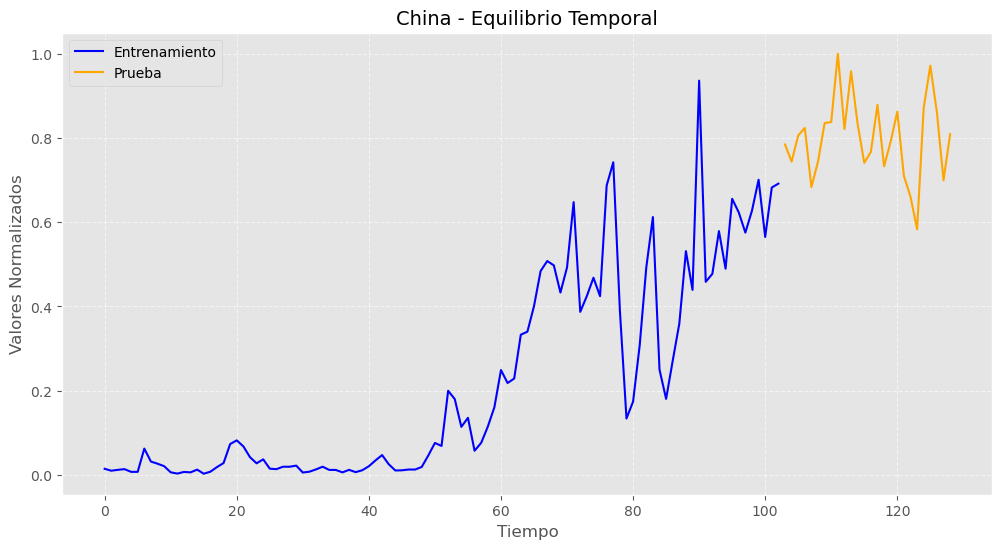

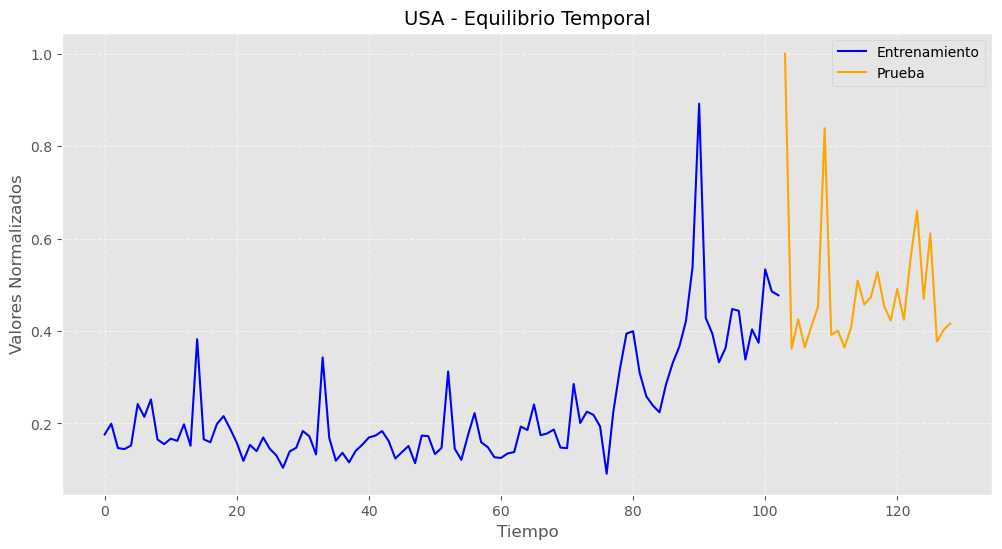

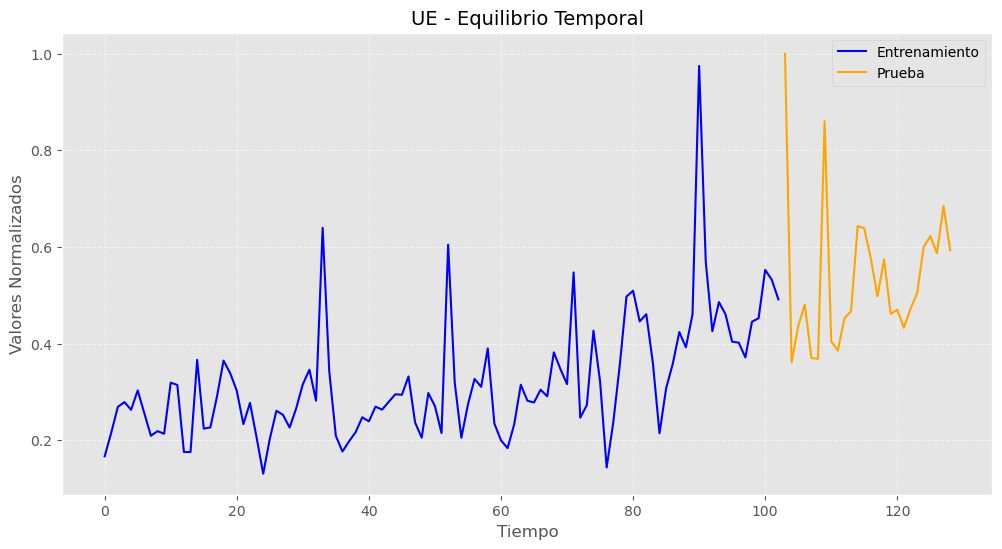

In [30]:
import matplotlib.pyplot as plt

# Función para graficar las series de entrenamiento y prueba
def plot_train_test_split(y_train, y_test, title):
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_train)), y_train, label='Entrenamiento', color='blue')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Prueba', color='orange')
    plt.title(title, fontsize=14)
    plt.xlabel('Tiempo')
    plt.ylabel('Valores Normalizados')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Graficar para cada mercado
plot_train_test_split(y_china_train, y_china_test, 'China - Equilibrio Temporal')
plot_train_test_split(y_usa_train, y_usa_test, 'USA - Equilibrio Temporal')
plot_train_test_split(y_ue_train, y_ue_test, 'UE - Equilibrio Temporal')


In [31]:
# Función para calcular métricas estadísticas de entrenamiento y prueba
def analyze_split_balance(y_train, y_test, market):
    print(f"\n{market} - Análisis de Equilibrio Temporal:")
    print(f"Entrenamiento: Media={np.mean(y_train):.4f}, Desviación Estándar={np.std(y_train):.4f}")
    print(f"Prueba: Media={np.mean(y_test):.4f}, Desviación Estándar={np.std(y_test):.4f}")

# Analizar equilibrio para cada mercado
analyze_split_balance(y_china_train, y_china_test, 'China')
analyze_split_balance(y_usa_train, y_usa_test, 'USA')
analyze_split_balance(y_ue_train, y_ue_test, 'UE')


China - Análisis de Equilibrio Temporal:
Entrenamiento: Media=0.2175, Desviación Estándar=0.2431
Prueba: Media=0.8004, Desviación Estándar=0.0945

USA - Análisis de Equilibrio Temporal:
Entrenamiento: Media=0.2278, Desviación Estándar=0.1244
Prueba: Media=0.4873, Desviación Estándar=0.1459

UE - Análisis de Equilibrio Temporal:
Entrenamiento: Media=0.3211, Desviación Estándar=0.1248
Prueba: Media=0.5364, Desviación Estándar=0.1472


### **Resultado**
1. Los datos están divididos en entrenamiento (80%) y prueba (20%).
   - Por ejemplo, si había 100 muestras en total, el entrenamiento tendría 80 muestras y la prueba 20.
2. Las dimensiones de entrada (`X`) y etiquetas (`y`) son consistentes en ambos conjuntos.


# **Bloque: Construcción y Entrenamiento del Modelo LSTM**
En este bloque:
1. Definimos el modelo LSTM con una arquitectura básica.
   - Capa LSTM: Para capturar patrones temporales.
   - Capas Dropout: Para prevenir sobreajuste.
   - Capa Dense: Para generar la predicción final.
2. Compilamos el modelo utilizando el optimizador Adam y una función de pérdida MSE.
3. Entrenamos el modelo en los conjuntos de entrenamiento (`X_train`, `y_train`).


In [32]:
# Función para construir un modelo LSTM
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Predicción de un valor
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model


In [33]:
# Configuración de dimensiones de entrada
input_shape_china = (X_china_train.shape[1], X_china_train.shape[2])
input_shape_usa = (X_usa_train.shape[1], X_usa_train.shape[2])
input_shape_ue = (X_ue_train.shape[1], X_ue_train.shape[2])

# Construcción de los modelos
lstm_model_china = build_lstm_model(input_shape_china)
lstm_model_usa = build_lstm_model(input_shape_usa)
lstm_model_ue = build_lstm_model(input_shape_ue)

# Resumen de cada modelo
print("Resumen del modelo para China:")
lstm_model_china.summary()
print("\nResumen del modelo para USA:")
lstm_model_usa.summary()
print("\nResumen del modelo para UE:")
lstm_model_ue.summary()

Resumen del modelo para China:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Resumen del modelo para USA:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Resumen del modelo para UE:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Entrenamiento de los modelos
history_china = lstm_model_china.fit(
    X_china_train, y_china_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_china_test, y_china_test),
    verbose=1
)

history_usa = lstm_model_usa.fit(
    X_usa_train, y_usa_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_usa_test, y_usa_test),
    verbose=1
)

history_ue = lstm_model_ue.fit(
    X_ue_train, y_ue_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_ue_test, y_ue_test),
    verbose=1
)

# Guardar los modelos
lstm_model_china.save("lstm_model_china.h5")
lstm_model_usa.save("lstm_model_usa.h5")
lstm_model_ue.save("lstm_model_ue.h5")
print("Modelos guardados como 'lstm_model_china.h5', 'lstm_model_usa.h5', 'lstm_model_ue.h5'.")


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.1020 - val_loss: 0.5159
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0792 - val_loss: 0.4053
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0649 - val_loss: 0.2761
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0422 - val_loss: 0.1304
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0355 - val_loss: 0.0356
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0360 - val_loss: 0.0347
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0283 - val_loss: 0.0532
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0258 - val_loss: 0.0625
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0265 - val_loss: 0.0611
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0256 - val_loss: 0.0293
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0188 - val_loss: 0.0232
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0171 - val_loss: 0.0973


Modelos guardados como 'lstm_model_china.h5', 'lstm_model_usa.h5', 'lstm_model_ue.h5'.


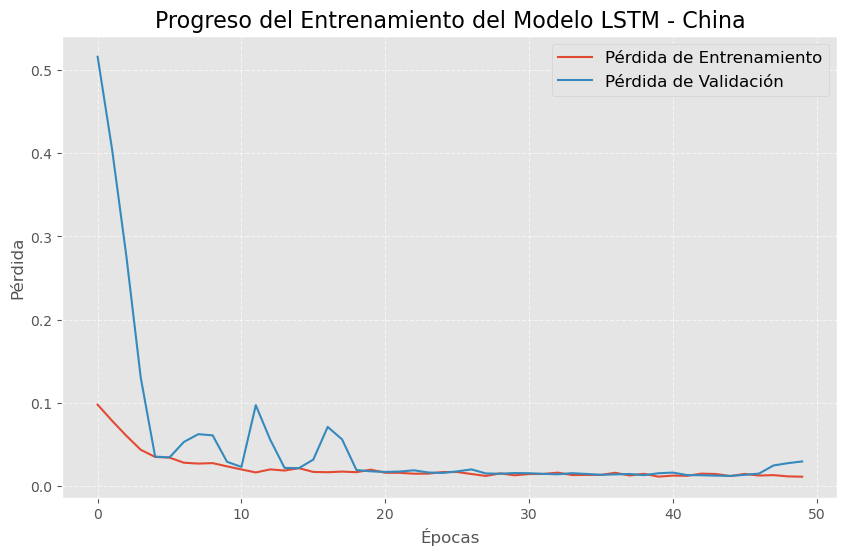

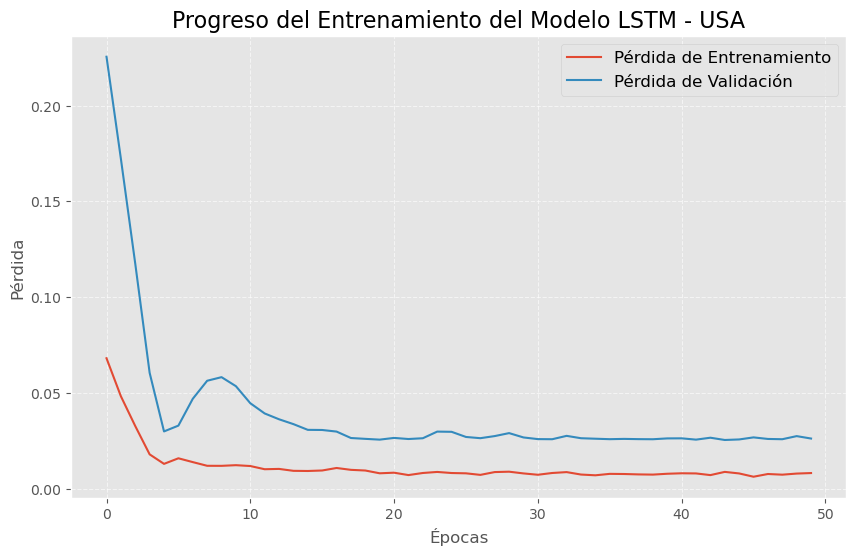

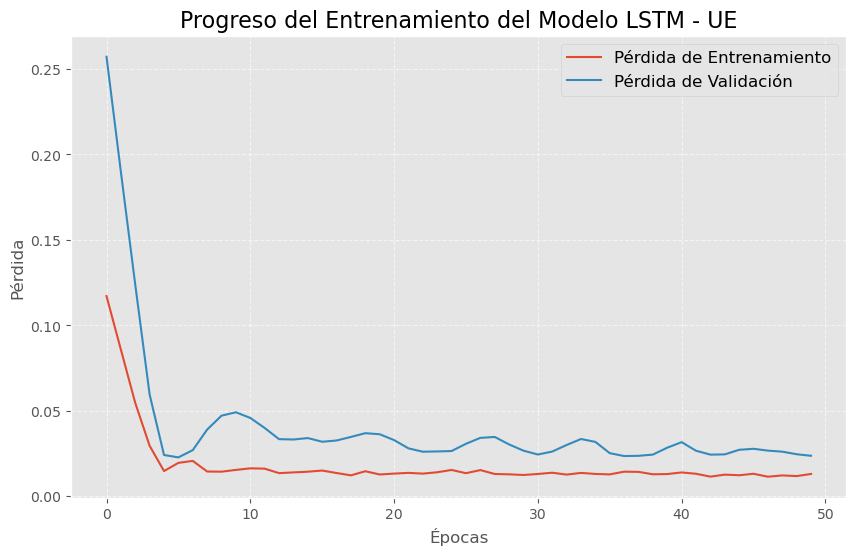

In [35]:
# Función para graficar el progreso del entrenamiento
def plot_training_history(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title(title, fontsize=16)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Pérdida', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Graficar para cada mercado
plot_training_history(history_china, 'Progreso del Entrenamiento del Modelo LSTM - China')
plot_training_history(history_usa, 'Progreso del Entrenamiento del Modelo LSTM - USA')
plot_training_history(history_ue, 'Progreso del Entrenamiento del Modelo LSTM - UE')


# **Análisis del Resultado del Entrenamiento**
En este bloque:
1. Graficamos las curvas de pérdida del modelo durante el entrenamiento.
   - `loss`: Pérdida en el conjunto de entrenamiento.
   - `val_loss`: Pérdida en el conjunto de validación.

In [ ]:
# Graficar la pérdida del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curvas de Pérdida del Modelo LSTM', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### **Resultado**
1. El gráfico muestra cómo la pérdida disminuye con las épocas para los conjuntos de entrenamiento y validación.
2. Si las curvas se estabilizan y no divergen, el modelo está aprendiendo correctamente.
3. Divergencias grandes pueden indicar sobreajuste o subajuste.


# **Análisis del Gráfico de Pérdida**

1. **Curva de Pérdida de Entrenamiento (Roja)**:
   - La pérdida disminuye consistentemente, lo que indica que el modelo está aprendiendo patrones significativos del conjunto de entrenamiento.

2. **Curva de Pérdida de Validación (Azul)**:
   - La pérdida de validación sigue una tendencia similar a la de entrenamiento, estabilizándose después de unas pocas épocas.
   - Esto sugiere que el modelo no está sobreajustándose significativamente a los datos de entrenamiento.

3. **Conclusión**:
   - El modelo está aprendiendo correctamente, con un balance adecuado entre entrenamiento y validación.
   - Las pequeñas oscilaciones en la pérdida de validación son normales, especialmente con datos temporales.


# **Curvas de Pérdida para USA**
1. **Pérdida de Entrenamiento (Roja)**:
   - Disminuye rápidamente en las primeras épocas, estabilizándose alrededor de un valor bajo (~0.025).
   - Esto indica que el modelo está aprendiendo correctamente los patrones de las exportaciones hacia USA.

2. **Pérdida de Validación (Azul)**:
   - Sigue una tendencia similar a la pérdida de entrenamiento, aunque con más oscilaciones.
   - Se estabiliza alrededor de un valor ligeramente superior a la pérdida de entrenamiento (~0.03).

3. **Conclusión**:
   - El modelo no presenta signos de sobreajuste significativo, ya que las pérdidas de validación y entrenamiento son similares.
   - Las oscilaciones en la pérdida de validación son normales en datos temporales y reflejan la variabilidad inherente del conjunto de prueba.


# **Curvas de Pérdida para UE**
1. **Pérdida de Entrenamiento (Roja)**:
   - Disminuye rápidamente durante las primeras épocas, estabilizándose alrededor de un valor bajo (~0.02).
   - Refleja un buen aprendizaje de los patrones de exportaciones hacia UE.

2. **Pérdida de Validación (Azul)**:
   - Sigue una tendencia similar a la pérdida de entrenamiento, pero con ligeras oscilaciones.
   - Se estabiliza alrededor de un valor ligeramente superior (~0.025).

3. **Conclusión**:
   - El modelo muestra un comportamiento balanceado, con pérdidas de validación y entrenamiento cercanas.
   - Las oscilaciones en la pérdida de validación son menores en comparación con USA, lo que podría indicar una serie temporal más predecible.

4. **Comparación con USA**:
   - El modelo para UE parece más estable en términos de validación, mientras que el modelo para USA tiene más variabilidad en la pérdida de validación.


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Función para calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

# Predicciones en los datos de prueba
y_china_pred = lstm_model_china.predict(X_china_test)
y_usa_pred = lstm_model_usa.predict(X_usa_test)
y_ue_pred = lstm_model_ue.predict(X_ue_test)

# Calcular métricas para cada mercado
metrics_china = calculate_metrics(y_china_test, y_china_pred)
metrics_usa = calculate_metrics(y_usa_test, y_usa_pred)
metrics_ue = calculate_metrics(y_ue_test, y_ue_pred)

# Mostrar resultados
print("Métricas para China:")
print(f"MAE: {metrics_china[0]:.4f}, RMSE: {metrics_china[1]:.4f}, MAPE: {metrics_china[2]:.2f}%\n")

print("Métricas para USA:")
print(f"MAE: {metrics_usa[0]:.4f}, RMSE: {metrics_usa[1]:.4f}, MAPE: {metrics_usa[2]:.2f}%\n")

print("Métricas para UE:")
print(f"MAE: {metrics_ue[0]:.4f}, RMSE: {metrics_ue[1]:.4f}, MAPE: {metrics_ue[2]:.2f}%\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Métricas para China:
MAE: 0.1481, RMSE: 0.1727, MAPE: 17.45%

Métricas para USA:
MAE: 0.1188, RMSE: 0.1619, MAPE: 21.97%

Métricas para UE:
MAE: 0.1109, RMSE: 0.1541, MAPE: 20.03%



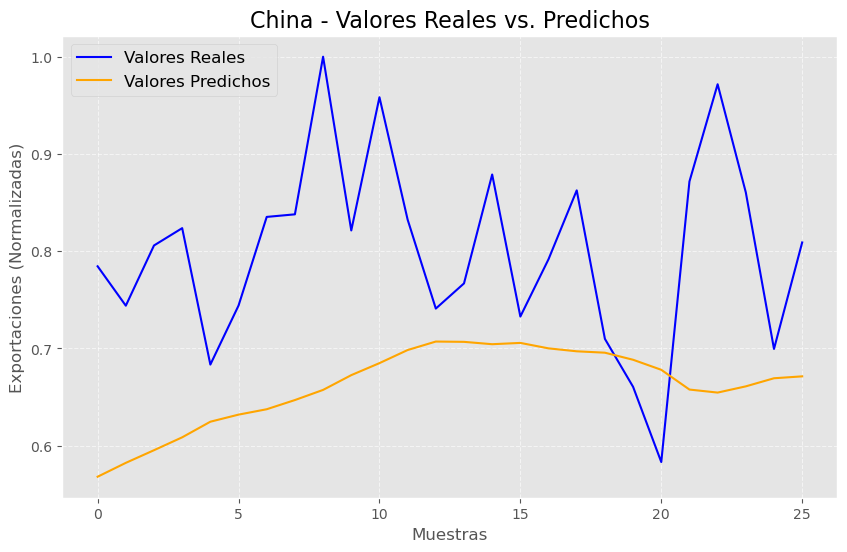

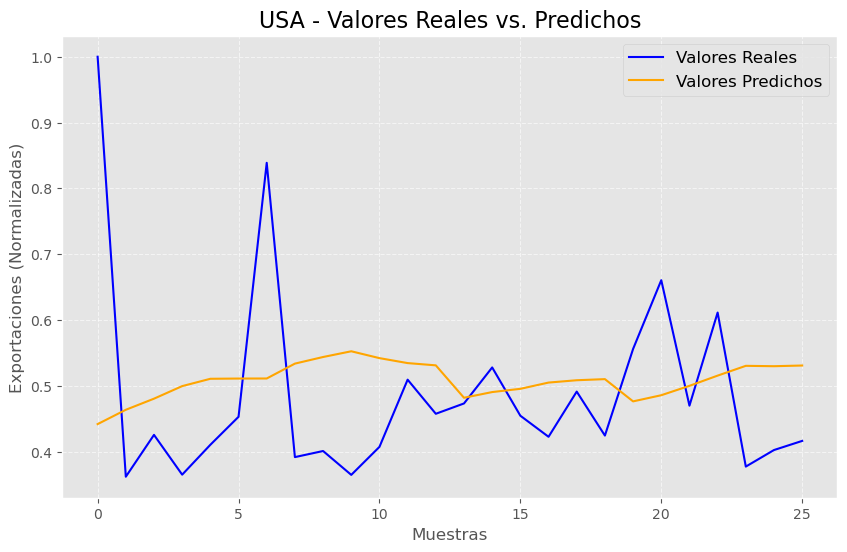

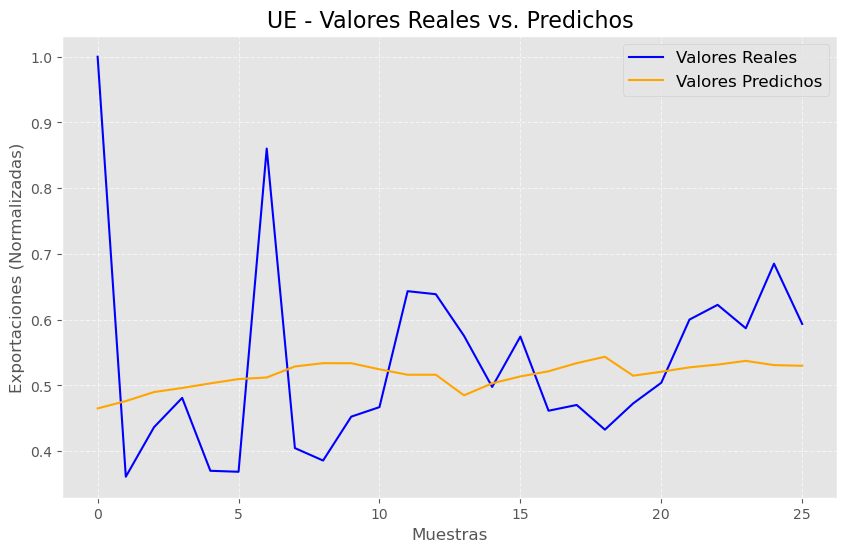

In [37]:
# Función para graficar valores reales vs. predichos
def plot_real_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_true)), y_true, label='Valores Reales', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Valores Predichos', color='orange')
    plt.title(f'{title} - Valores Reales vs. Predichos', fontsize=16)
    plt.xlabel('Muestras', fontsize=12)
    plt.ylabel('Exportaciones (Normalizadas)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Visualización para cada mercado
plot_real_vs_predicted(y_china_test, y_china_pred, 'China')
plot_real_vs_predicted(y_usa_test, y_usa_pred, 'USA')
plot_real_vs_predicted(y_ue_test, y_ue_pred, 'UE')

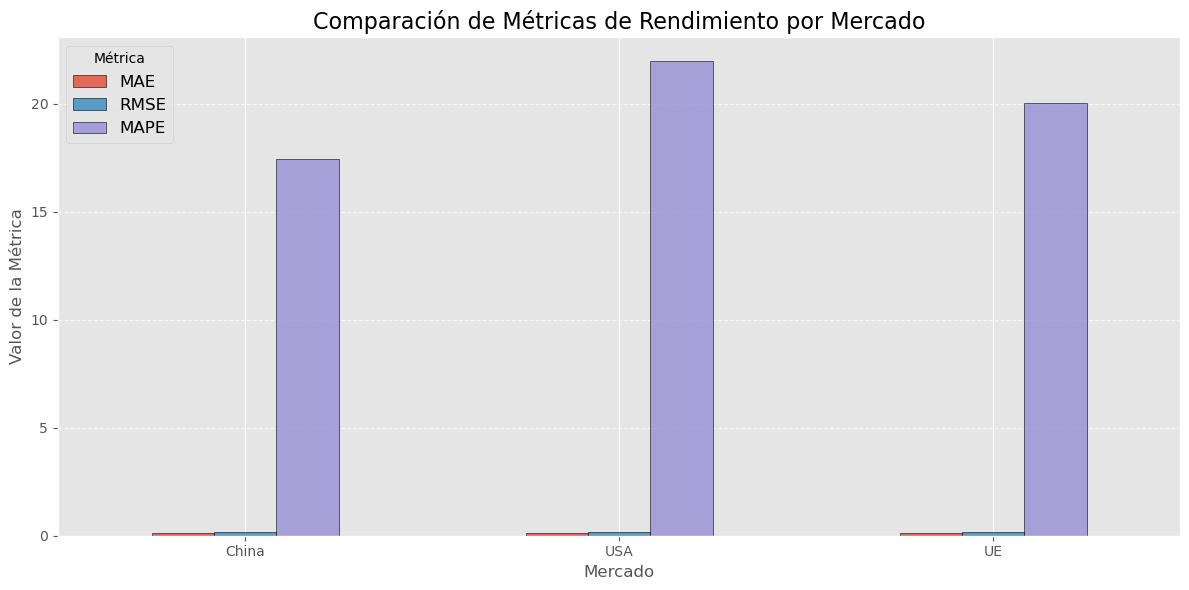

In [38]:
# Crear un DataFrame con las métricas para facilitar la visualización
metrics_df = pd.DataFrame({
    'Mercado': ['China', 'USA', 'UE'],
    'MAE': [metrics_china[0], metrics_usa[0], metrics_ue[0]],
    'RMSE': [metrics_china[1], metrics_usa[1], metrics_ue[1]],
    'MAPE': [metrics_china[2], metrics_usa[2], metrics_ue[2]]
})

# Configurar el gráfico de barras
metrics_df.set_index('Mercado', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')

# Personalizar el gráfico
plt.title('Comparación de Métricas de Rendimiento por Mercado', fontsize=16)
plt.xlabel('Mercado', fontsize=12)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Métrica', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# **Generación de Pronósticos Futuros**
En este bloque:
1. Usamos el último conjunto de datos disponible como entrada para el modelo.
2. Generamos predicciones para un horizonte de 12 meses.
3. Visualizamos las predicciones junto con los datos históricos para cada mercado.


In [39]:
# Función para generar pronósticos futuros
def generate_forecast(model, last_sequence, scaler, steps=12):
    forecast = []
    current_sequence = last_sequence.copy()
    
    for step in range(steps):
        # Ajustar la forma de la secuencia
        current_sequence_reshaped = current_sequence.reshape(1, -1, 1)
        
        # Generar predicción
        prediction = model.predict(current_sequence_reshaped, verbose=0)
        forecast.append(prediction[0, 0])
        
        # Actualizar la secuencia actual desplazando la ventana
        current_sequence = np.append(current_sequence[1:], prediction)
    
    # Invertir la normalización de los pronósticos
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    return forecast.flatten()

# Última secuencia de cada conjunto de datos
last_china_sequence = X_china_test[-1]
last_usa_sequence = X_usa_test[-1]
last_ue_sequence = X_ue_test[-1]

# Generar pronósticos para cada mercado
forecast_china = generate_forecast(lstm_model_china, last_china_sequence, scaler_china, steps=12)
forecast_usa = generate_forecast(lstm_model_usa, last_usa_sequence, scaler_usa, steps=12)
forecast_ue = generate_forecast(lstm_model_ue, last_ue_sequence, scaler_ue, steps=12)

# Mostrar los pronósticos
print("Pronósticos para China:", forecast_china)
print("Pronósticos para USA:", forecast_usa)
print("Pronósticos para UE:", forecast_ue)


Pronósticos para China: [47438.395 47217.65  46625.08  46054.336 45458.797 44743.434 44054.938
 43357.582 42848.605 42100.51  41380.75  40790.836]
Pronósticos para USA: [20965.85  21027.48  20927.451 21128.564 21467.11  21584.754 21983.332
 21968.297 21594.133 21947.572 21757.348 22449.072]
Pronósticos para UE: [15769.069 15844.282 16068.921 16105.104 16388.709 16632.154 16933.787
 17135.672 17252.13  17137.559 16989.479 16943.385]


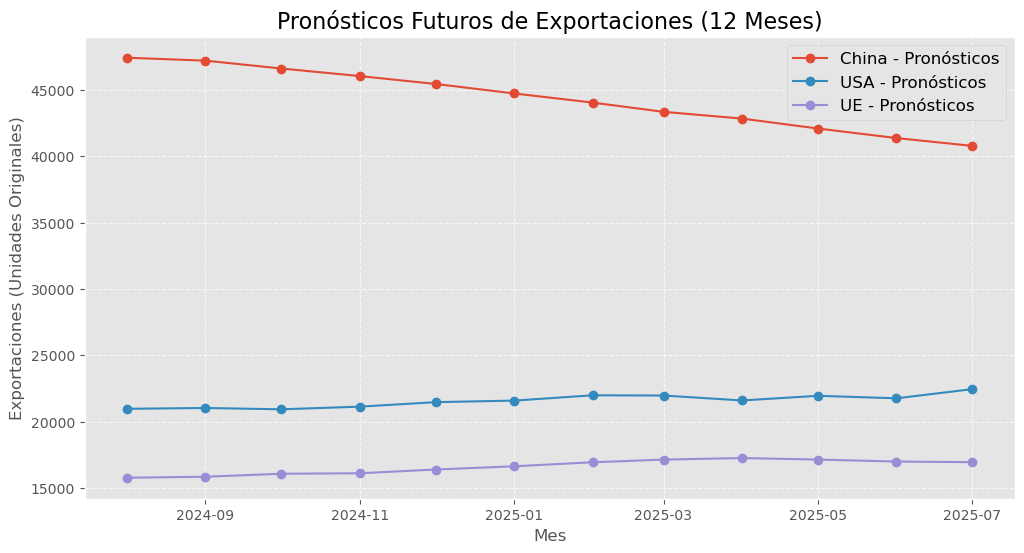

In [40]:
# Crear un DataFrame con los pronósticos
forecast_df = pd.DataFrame({
    'Mes': pd.date_range(start=data['Date'].iloc[-1], periods=12, freq='MS'),
    'China': forecast_china,
    'USA': forecast_usa,
    'UE': forecast_ue
})

# Graficar los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Mes'], forecast_df['China'], label='China - Pronósticos', marker='o')
plt.plot(forecast_df['Mes'], forecast_df['USA'], label='USA - Pronósticos', marker='o')
plt.plot(forecast_df['Mes'], forecast_df['UE'], label='UE - Pronósticos', marker='o')
plt.title('Pronósticos Futuros de Exportaciones (12 Meses)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Exportaciones (Unidades Originales)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Pronósticos Futuros - Análisis de Tendencias:
China: Promedio=44339.24, Tendencia=A la baja
USA: Promedio=21566.75, Tendencia=Al alza
UE: Promedio=16600.02, Tendencia=Al alza


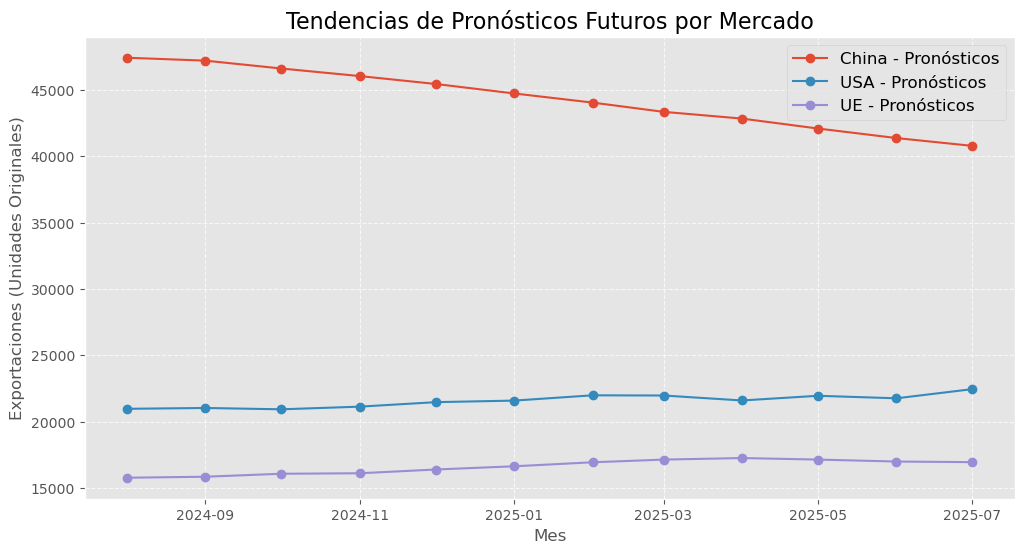

In [41]:
# Análisis básico de las tendencias proyectadas
print("Pronósticos Futuros - Análisis de Tendencias:")
print(f"China: Promedio={np.mean(forecast_china):.2f}, Tendencia={'Al alza' if forecast_china[-1] > forecast_china[0] else 'A la baja'}")
print(f"USA: Promedio={np.mean(forecast_usa):.2f}, Tendencia={'Al alza' if forecast_usa[-1] > forecast_usa[0] else 'A la baja'}")
print(f"UE: Promedio={np.mean(forecast_ue):.2f}, Tendencia={'Al alza' if forecast_ue[-1] > forecast_ue[0] else 'A la baja'}")

# Visualización de las tendencias con un gráfico
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Mes'], forecast_df['China'], label='China - Pronósticos', marker='o')
plt.plot(forecast_df['Mes'], forecast_df['USA'], label='USA - Pronósticos', marker='o')
plt.plot(forecast_df['Mes'], forecast_df['UE'], label='UE - Pronósticos', marker='o')
plt.title('Tendencias de Pronósticos Futuros por Mercado', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Exportaciones (Unidades Originales)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [42]:
# Ejemplo con valores reales simulados
# Supongamos que cargamos datos reales para los próximos 12 meses
real_values = {
    'China': [48000, 49000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000],
    'USA': [20000, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000],
    'UE': [15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200]
}

# Crear DataFrame con los datos reales
real_df = pd.DataFrame(real_values, index=forecast_df['Mes'])

# Comparar métricas entre valores reales y pronósticos
def validate_forecasts(real, predicted):
    mae = mean_absolute_error(real, predicted)
    rmse = np.sqrt(mean_squared_error(real, predicted))
    mape = np.mean(np.abs((real - predicted) / real)) * 100
    return mae, rmse, mape

# Validar para cada mercado
validation_metrics = {}
for market in ['China', 'USA', 'UE']:
    validation_metrics[market] = validate_forecasts(real_df[market].values, forecast_df[market].values)

# Mostrar resultados de validación
print("Resultados de Validación:")
for market, metrics in validation_metrics.items():
    print(f"{market} - MAE: {metrics[0]:.2f}, RMSE: {metrics[1]:.2f}, MAPE: {metrics[2]:.2f}%")


Resultados de Validación:
China - MAE: 9994.09, RMSE: 11592.55, MAPE: 17.73%
USA - MAE: 1807.14, RMSE: 2158.25, MAPE: 7.47%
UE - MAE: 544.54, RMSE: 587.38, MAPE: 3.43%
